In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Expanded_data_with_more_features.csv to Expanded_data_with_more_features.csv


In [ ]:
df = pd.read_csv("Expanded_data_with_more_features.csv")
df.head()


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [ ]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Gender,0
EthnicGroup,1840
ParentEduc,1845
LunchType,0
TestPrep,1830
ParentMaritalStatus,1190
PracticeSport,631
IsFirstChild,904
NrSiblings,1572


#drop unnamed column

In [ ]:
df=df.drop(columns=['Unnamed: 0'])
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


#Gender Distribution

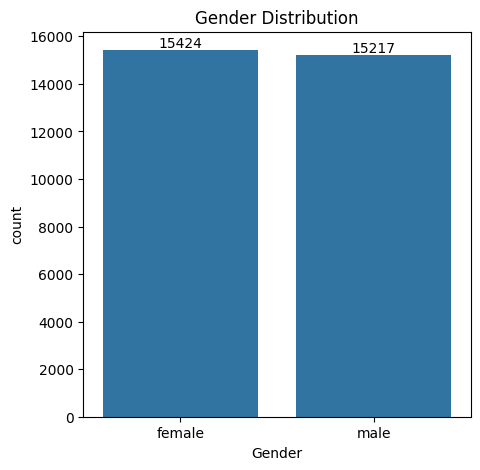

In [ ]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data=df,x='Gender')
ax.bar_label(ax.containers[0])
plt.title('Gender Distribution')
plt.show()

In [ ]:
# from the above chart we have analysed that:
# the number of females in the data is more than the number of males

In [ ]:
gb=df.groupby('ParentEduc').agg({"MathScore":'mean',"WritingScore":"mean",'ReadingScore':'mean'})
print(gb)

                    MathScore  WritingScore  ReadingScore
ParentEduc                                               
associate's degree  68.365586     70.299099     71.124324
bachelor's degree   70.466627     73.331069     73.062020
high school         64.435731     65.421136     67.213997
master's degree     72.336134     76.356896     75.832921
some college        66.390472     68.501432     69.179708
some high school    62.584013     63.632409     65.510785


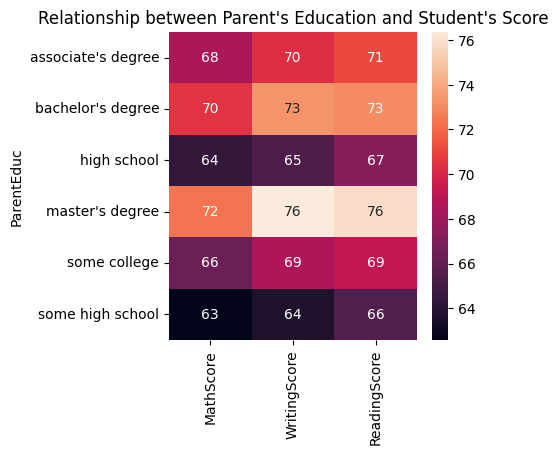

In [ ]:
plt.figure(figsize=(4,4))
sns.heatmap(gb,annot=True)
plt.title("Relationship between Parent's Education and Student's Score")
plt.show()


In [ ]:
#from the above chart we have conclued that the education of the parents have a good impact on their scores


In [ ]:
gb1=df.groupby('ParentMaritalStatus').agg({"MathScore":'mean',"WritingScore":"mean",'ReadingScore':'mean'})
print(gb1)

                     MathScore  WritingScore  ReadingScore
ParentMaritalStatus                                       
divorced             66.691197     68.799146     69.655011
married              66.657326     68.420981     69.389575
single               66.165704     68.174440     69.157250
widowed              67.368866     68.563452     69.651438


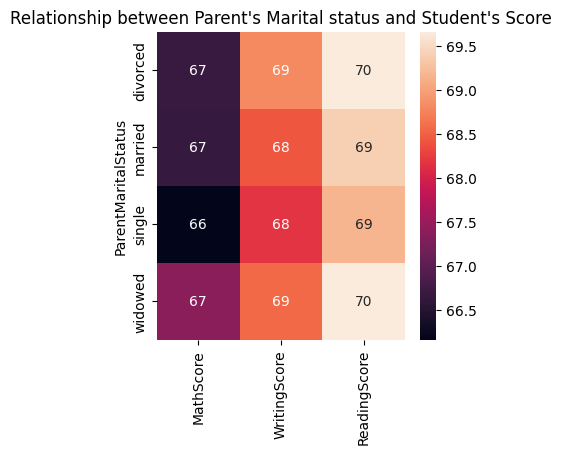

In [ ]:
plt.figure(figsize=(4,4))
sns.heatmap(gb1,annot=True)
plt.title("Relationship between Parent's Marital status and Student's Score")
plt.show()

In [ ]:
#from the above chart we have conclued that there is no/negligible impact on the
# student's score due to their parent's marital status

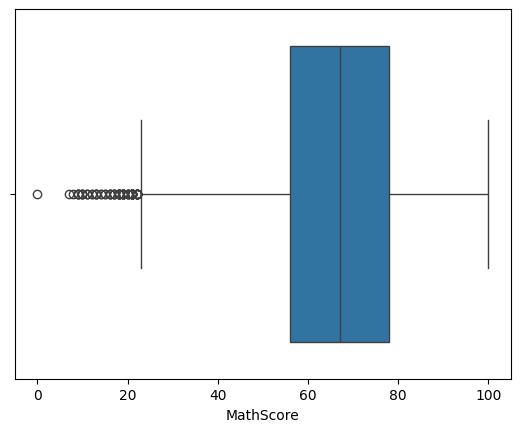

In [ ]:
sns.boxplot(data=df,x='MathScore')
plt.show()

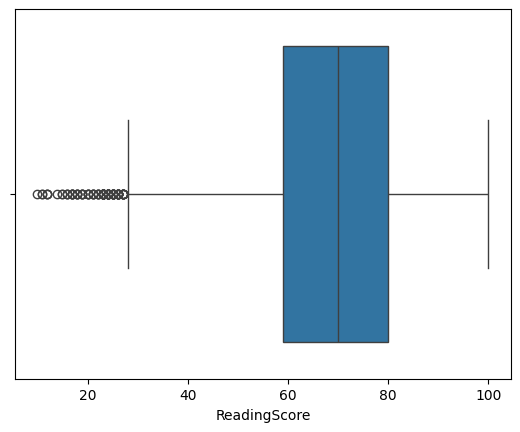

In [ ]:
sns.boxplot(data=df,x='ReadingScore')
plt.show()

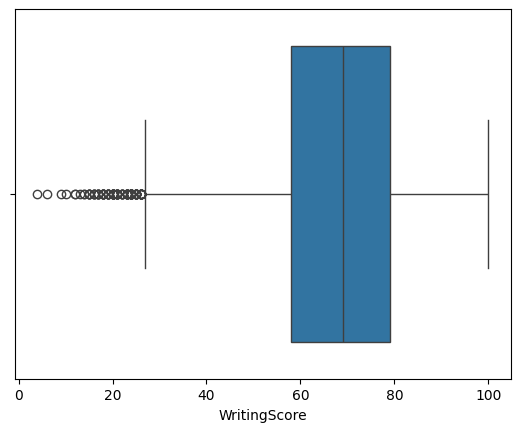

In [ ]:
sns.boxplot(data=df,x='WritingScore')
plt.show()

In [ ]:
print(df['EthnicGroup'].unique())


[nan 'group C' 'group B' 'group A' 'group D' 'group E']


#Distribution of Ethnoic Groups

[np.int64(2219), np.int64(5826), np.int64(9212), np.int64(7503), np.int64(4041)]


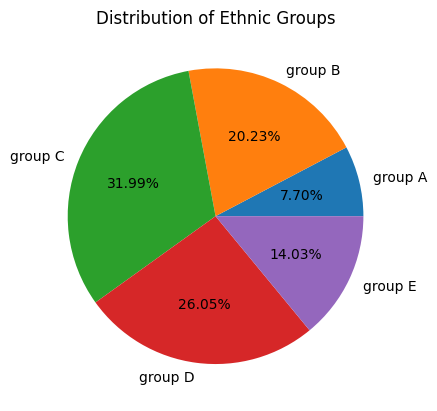

In [ ]:
groupA = df.loc[(df['EthnicGroup'] == 'group A')].count()
groupB = df.loc[(df['EthnicGroup'] == 'group B')].count()
groupC = df.loc[(df['EthnicGroup'] == 'group C')].count()
groupD = df.loc[(df['EthnicGroup'] == 'group D')].count()
groupE = df.loc[(df['EthnicGroup'] == 'group E')].count()

l = ['group A','group B', 'group C', 'group D', 'group E']
mlist =[groupA['EthnicGroup'],groupB['EthnicGroup'],groupC['EthnicGroup'],groupD['EthnicGroup'],groupE['EthnicGroup']]

print(mlist)
plt.pie(mlist, labels=l, autopct='%1.2f%%')
plt.title("Distribution of Ethnic Groups")
plt.show()

[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

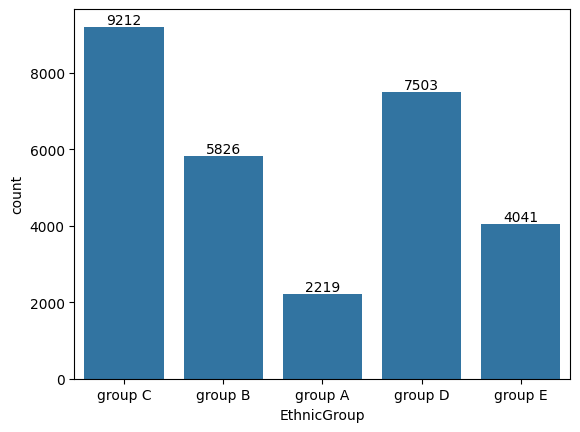

In [ ]:
ax=sns.countplot(data = df, x="EthnicGroup")
ax.bar_label(ax.containers[0])